In [1]:
# %% load libraries
import numpy as np
import pandas as pd
import upsetplot

In [13]:
# %% fake data
'''
We simulate data on inter-temporal patterns of purchasing behavior (e.g.,
Amazon users buying stuff at different points in time)
The data contain 50 consumers and 5 periods of time; `1' = individual `i'
purchases item ABC at time `j'; 0 = no purchase
'''
# purchases
purchase_patterns = np.random.binomial(n=1, p=1/3, size=(50, 5))   # array of 50 rows, 5 columns

# wrap up data
df = pd.DataFrame(purchase_patterns)

# rename cols
old_cols = df.columns
new_cols = ['t{}'.format(i) for i in old_cols]   # editing the column titles

df.rename(columns=dict(zip(old_cols, new_cols)), inplace=True)
df.loc[:, 'consumer_id'] = np.arange(0, len(df))

In [14]:
# preview
df.head()

,t0,t1,t2,t3,t4,consumer_id
0,0,1,0,0,1,0
1,0,0,0,1,0,1
2,0,1,0,1,1,2
3,0,1,1,0,1,3
4,0,1,0,0,0,4


{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x25f63d38e08>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x25f63d3acc8>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x25f63c9ac48>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x25f63f30cc8>}

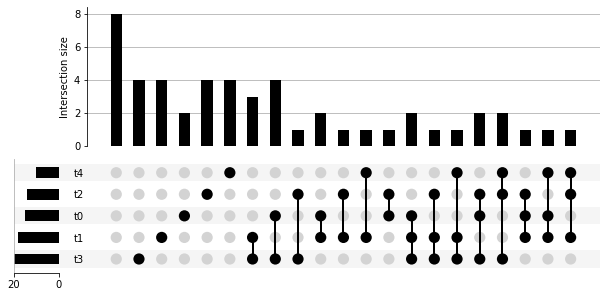

In [15]:
# %% manipulate data to create an upset plot

# collapse consumers around common purchasing patterns
df.loc[:, 'count'] = 1
gr = df.groupby(['t0', 't1', 't2', 't3', 't4'])   # what does this show?
df = gr['count'].agg(np.sum)

# plot data
upsetplot.plot(df, orientation='horizontal')

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x25f639bc5c8>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x25f63135a08>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x25f63b7adc8>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x25f63be4648>}

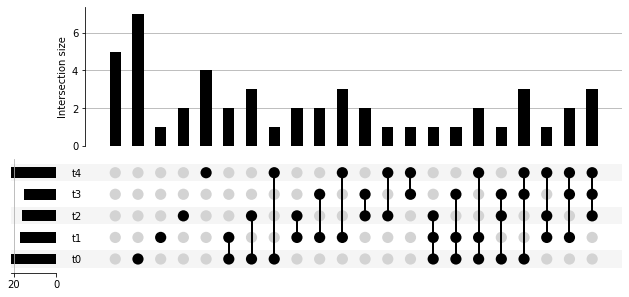

In [11]:
# %% manipulate data to create an upset plot

# collapse consumers around common purchasing patterns
df.loc[:, 'count'] = 1
gr = df.groupby(['t0', 't1', 't2', 't3', 't4'])
df = gr['count'].agg(np.sum)

# plot data
upsetplot.plot(df, orientation='horizontal', sort_categories_by=None)  
# sorting the left labels from ascending order 4 to 0

Q1: What's the meaning of the first bar?

A: there are 'n' customers with not purchases

Q2: what's the meaning of the 'top' bar chart?

A: each bar is the count of instances showing a configuration (a pattern) of purchasing behavior

